In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [5]:
# Ruta al archivo
file_path = "C:\\Users\\Usuario\\BITalino\\archivo_base.txt"

# Leer el archivo, omitiendo el encabezado
data = pd.read_csv(file_path, sep="\t", comment="#", header=None)  # Ignora líneas que comienzan con "#"

# Eliminar columnas que contengan exclusivamente valores NaN (se elimina una séptima columna)
data = data.dropna(axis=1, how="all")

# Mostrar las primeras filas para verificar que salen los datos correctamente
print(data.head()) # Podemos imprimir todos los datos también

   0  1  2  3  4    5    6
0  0  0  0  0  0  515  521
1  1  0  0  0  0  510  521
2  2  0  0  0  0  510  521
3  3  0  0  0  0  512  522
4  4  0  0  0  0  510  523


In [6]:
# Asignar nombres a las columnas restantes
data.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2"]

# Seleccionar únicamente la columna relevante (A1)
emg_data = data[["nSeq", "A1", "A2"]]
print(emg_data.head())

# Guardar el archivo limpio
emg_data.to_csv("archivo_base_limpio.csv", index=False)
print(f"Datos limpios guardados: {data.shape}")

   nSeq   A1   A2
0     0  515  521
1     1  510  521
2     2  510  521
3     3  512  522
4     4  510  523
Datos limpios guardados: (88950, 7)


Hacer lo mismo con el resto de señales, las que vamos a comparar

In [7]:
import pandas as pd

# Rutas de los archivos de entrada y salida
input_files = [
    "C:\\Users\\Usuario\\BITalino\\archivo_base.txt",
    "C:\\Users\\Usuario\\BITalino\\senal1.txt",
    "C:\\Users\\Usuario\\BITalino\\senal2.txt",
    "C:\\Users\\Usuario\\BITalino\\senal3.txt",
    "C:\\Users\\Usuario\\BITalino\\senal4.txt",
    "C:\\Users\\Usuario\\BITalino\\senal5.txt",
]

output_files = [
    "C:\\Users\\Usuario\\BITalino\\archivo_base_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal1_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal2_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal3_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal4_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal5_limpio.csv",
]

# Procesar cada archivo
for input_path, output_path in zip(input_files, output_files):
    data = pd.read_csv(input_path, sep="\t", comment="#", header=None)
    data = data.dropna(axis=1, how="all")
    data.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2"]
    emg_data = data[["nSeq", "A1", "A2"]]
    emg_data.to_csv(output_path, index=False)
    print(f"Datos limpios guardados en: {output_path}")

Datos limpios guardados en: C:\Users\Usuario\BITalino\archivo_base_limpio.csv
Datos limpios guardados en: C:\Users\Usuario\BITalino\senal1_limpio.csv
Datos limpios guardados en: C:\Users\Usuario\BITalino\senal2_limpio.csv
Datos limpios guardados en: C:\Users\Usuario\BITalino\senal3_limpio.csv
Datos limpios guardados en: C:\Users\Usuario\BITalino\senal4_limpio.csv
Datos limpios guardados en: C:\Users\Usuario\BITalino\senal5_limpio.csv


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear X y y a partir del DataFrame combinado
X = combined_signals.iloc[:, :-1]  # Todas las señales excepto la última
y = combined_signals.iloc[:, -1]   # Última señal como objetivo

# Eliminar filas con valores NaN en X o y
X = X.dropna()
y = y.loc[X.index]  # Mantener la correspondencia con X

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.4f}")


Error cuadrático medio: 11.1036


Un Error cuadrático medio (MSE) de 11.1036 indica que, en promedio, las predicciones del modelo de regresión lineal tienen un error cuadrático medio de 11.1036 unidades con respecto a los valores reales.

In [10]:
import pandas as pd
base_file = "C:\\Users\\Usuario\\BITalino\\archivo_base_limpio.csv"
senal_files = [
    "C:\\Users\\Usuario\\BITalino\\senal1_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal2_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal3_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal4_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal5_limpio.csv"
]
base_data = pd.read_csv(base_file)
base_A1 = base_data['A1']
base_A2 = base_data['A2']  

# Inicializar un DataFrame para almacenar correlaciones
correlations = {}

# Calcular las correlaciones con cada archivo de señal
for i, file in enumerate(senal_files, start=1):
    signal_data = pd.read_csv(file)
    signal_A1 = signal_data['A1']
    signal_A2 = signal_data['A2']
    
    min_len = min(len(base_A1), len(signal_A1))
    base_A1_trim, signal_A1_trim = base_A1[:min_len], signal_A1[:min_len]
    base_A2_trim, signal_A2_trim = base_A2[:min_len], signal_A2[:min_len]
    
    correlation_A1 = base_A1_trim.corr(signal_A1_trim)
    correlation_A2 = base_A2_trim.corr(signal_A2_trim)

    correlations[f"senal{i}_A1"] = correlation_A1
    correlations[f"senal{i}_A2"] = correlation_A2

# Mostrar las correlaciones
print("Correlaciones con respecto a la señal base:")
for key, value in correlations.items():
    print(f"{key}: {value:.4f}")

Correlaciones con respecto a la señal base:
senal1_A1: -0.0447
senal1_A2: -0.0835
senal2_A1: 0.0166
senal2_A2: -0.0435
senal3_A1: 0.0115
senal3_A2: 0.0174
senal4_A1: -0.0132
senal4_A2: 0.0340
senal5_A1: 0.0037
senal5_A2: 0.0300


Ahora vamos a superponer las señales A1 (EMG) en una gráfica para visualizar las correlaciones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Frecuencia de muestreo en Hz (ajústala según tus datos BITalino)
frecuencia_muestreo = 1000  # 1 kHz = 1000 muestras por segundo

base_data = pd.read_csv("C:\\Users\\Usuario\\BITalino\\archivo_base_limpio.csv")
base_A1 = base_data['A1']

tiempo_base = np.arange(0, len(base_A1)) / frecuencia_muestreo

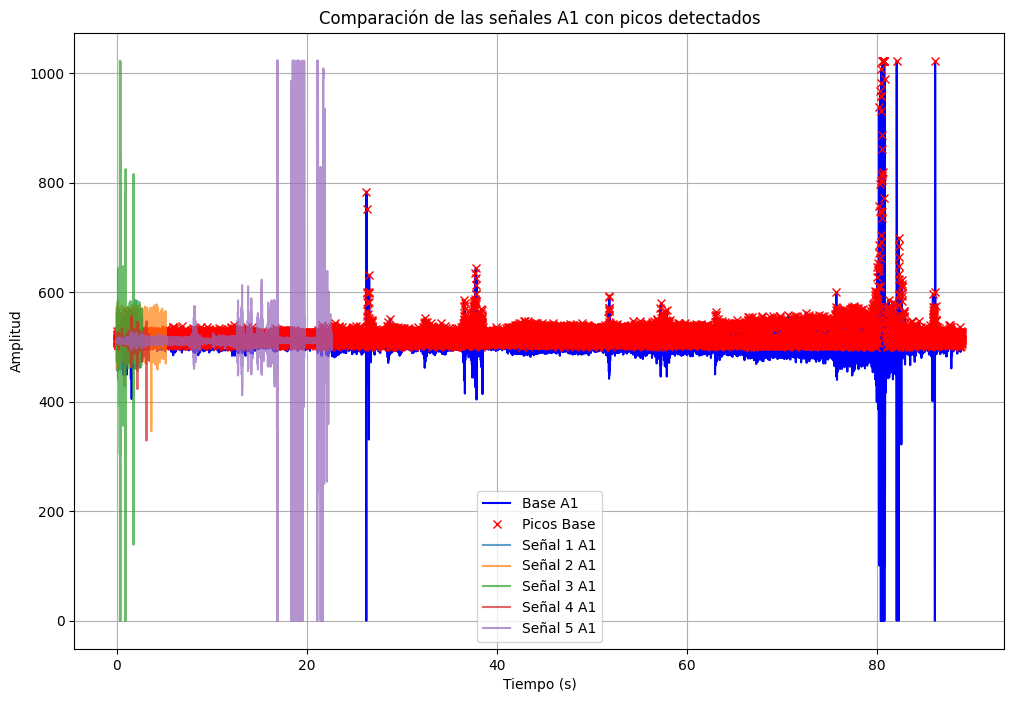

In [16]:
# Lista de archivos con las otras señales
archivos_senales = [
    "C:\\Users\\Usuario\\BITalino\\senal1_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal2_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal3_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal4_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal5_limpio.csv"
]

senales_A1 = []
for archivo in archivos_senales:
    data = pd.read_csv(archivo)
    senales_A1.append(data['A1'])

# Detectar picos en la señal base
picos_base, _ = find_peaks(base_A1, height=500)  # Ajusta 'height' según tus datos

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Gráfica de la señal base con picos
plt.plot(tiempo_base, base_A1, label="Base A1", color="blue")
plt.plot(tiempo_base[picos_base], base_A1[picos_base], "rx", label="Picos Base")  # Marcar picos

# Añadir las otras señales (ajustar longitud de tiempo si es necesario)
for i, senal in enumerate(senales_A1):
    tiempo_senal = np.arange(0, len(senal)) / frecuencia_muestreo  # Crear tiempo para cada señal
    plt.plot(tiempo_senal, senal, label=f"Señal {i+1} A1", alpha=0.7)

# Configuración del gráfico
plt.title("Comparación de las señales A1 con picos detectados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

Datos combinados:
   Signal_1  Signal_2  Signal_3  Signal_4  Signal_5  Signal_6
0     515.0     508.0     511.0     510.0     516.0     512.0
1     510.0     509.0     519.0     513.0     521.0     511.0
2     510.0     513.0     528.0     512.0     519.0     510.0
3     512.0     508.0     475.0     509.0     509.0     510.0
4     510.0     508.0     480.0     511.0     515.0     511.0


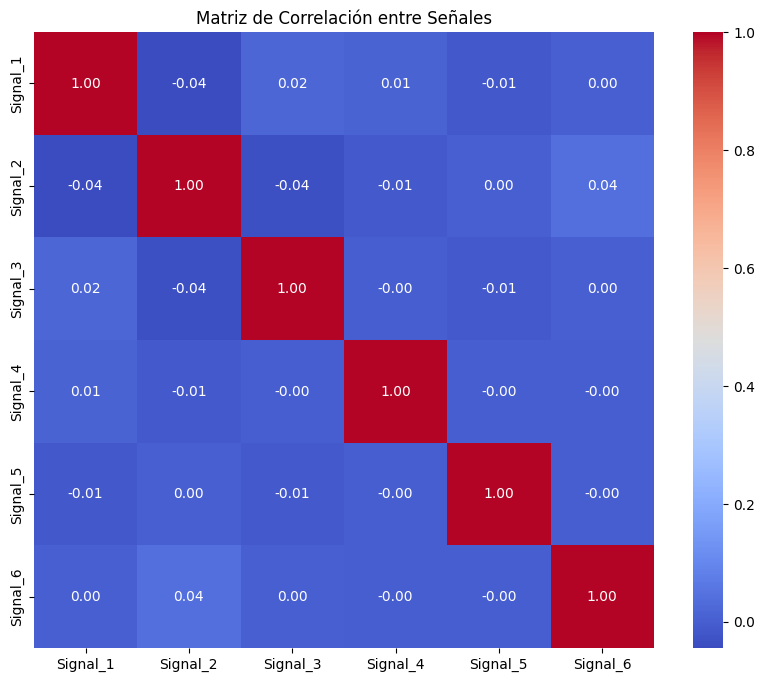

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_files = [
    "C:\\Users\\Usuario\\BITalino\\archivo_base_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal1_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal2_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal3_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal4_limpio.csv",
    "C:\\Users\\Usuario\\BITalino\\senal5_limpio.csv",
]

# Combinar todas las señales
signals = []
for file in cleaned_files:
    data = pd.read_csv(file)
    signals.append(data["A1"])  

# Crear un DataFrame combinado
combined_signals = pd.DataFrame(signals).transpose()
combined_signals.columns = [f"Signal_{i+1}" for i in range(len(signals))]

print("Datos combinados:")
print(combined_signals.head())

correlation_matrix = combined_signals.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Señales")
plt.show()